In [2]:
import pandas
import datetime
%pylab inline
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [180]:
%%R
library(lme4)
library(lmerTest)
library(ggplot2)
library(effects)
library(sjPlot)
library(sjmisc)
library(plm)
library(stargazer)

In [3]:
ab_df = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','smart_location','number_of_reviews'])
ab_df['any_reviews']  = ab_df['number_of_reviews'].apply(lambda x: int(x!=0))
ab_df_reviewful = ab_df[ab_df['any_reviews'] == 1]
hosts = ab_df.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})
hosts_refver = ab_df_reviewful.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})

In [4]:
cs_df = pandas.read_csv('couchsurfing/clean_hosts.csv',usecols=['people_id','member_since','city','state','status','verified_status','references_int'])

def get_year(s):
    try:
        return datetime.datetime(int(s.split("Member since ")[1]), 1, 1)
    except:
        return None
    
cs_df['member_since'] = cs_df['member_since'].apply(get_year)
cs_df_defhosts = cs_df[cs_df['status'] == 'Accepting Guests']
cs_df_defhosts['any_verification'] = cs_df_defhosts['verified_status'].apply(lambda x: int(x != 'Not Verified'))
cs_df_defhosts['any_references'] = cs_df_defhosts['references_int'].apply(lambda x: int(x != 0))
cs_df_defhosts['any_ref_ver'] = cs_df_defhosts[['any_references','any_verification']].apply(lambda row: row[0] or row[1], axis=1)
cs_df_defhosts_refver = cs_df_defhosts[cs_df_defhosts['any_ref_ver'] == 1]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [5]:
unique(cs_df['status'].values)

array(['Accepting Guests', 'Maybe Accepting Guests',
       'Not Accepting Guests', 'Wants to Meet Up'], dtype=object)

In [6]:
hosts['host_since'] = hosts['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
hosts_refver['host_since'] = hosts_refver['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)

In [7]:
ab_since_global = hosts.groupby(by='host_since').agg(len)
ab_since_global_refver = hosts_refver.groupby(by='host_since').agg(len)

In [8]:
ab_daily_roll = pandas.rolling_mean(ab_since_global, window=10)

(array([ 733408.,  733773.,  734138.,  734503.,  734869.,  735234.,
         735599.,  735964.]), <a list of 8 Text xticklabel objects>)

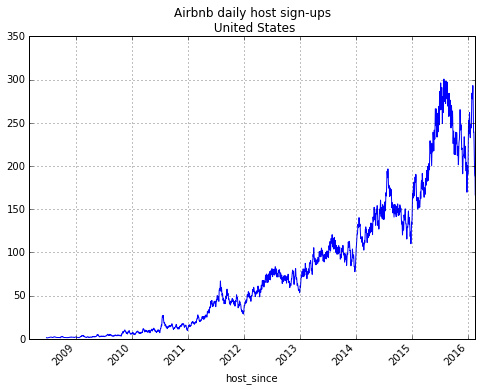

In [9]:
ax = ab_daily_roll.plot(legend=False, title='Airbnb daily host sign-ups \n United States', figsize=(8,6))
plt.xticks(rotation=45)

In [10]:
cs_since_global = cs_df.groupby(by='member_since').count()
cs_since_global_defhosts = cs_df_defhosts.groupby(by='member_since').count()
cs_since_global_defhosts_refver = cs_df_defhosts_refver.groupby(by='member_since').count()

In [11]:
cs_since_global

,city,people_id,state,status,verified_status,references_int
member_since,,,,,,
2003-01-01,53,53,53,53,53,53
2004-01-01,1396,1398,1398,1398,1398,1398
2005-01-01,6854,6856,6856,6856,6856,6856
2006-01-01,10307,10321,10321,10321,10321,10321
2007-01-01,23286,23307,23307,23307,23307,23307
2008-01-01,39086,39110,39110,39110,39110,39110
2009-01-01,47375,47427,47427,47427,47427,47427
2010-01-01,47326,47385,47385,47385,47385,47385
2011-01-01,36424,36491,36491,36491,36491,36491


In [12]:
cs_since_global_defhosts

,city,people_id,state,status,verified_status,references_int,any_verification,any_references,any_ref_ver
member_since,,,,,,,,,
2003-01-01,31,31,31,31,31,31,31,31,31
2004-01-01,867,868,868,868,868,868,868,868,868
2005-01-01,3835,3837,3837,3837,3837,3837,3837,3837,3837
2006-01-01,6038,6046,6046,6046,6046,6046,6046,6046,6046
2007-01-01,13958,13967,13967,13967,13967,13967,13967,13967,13967
2008-01-01,23593,23604,23604,23604,23604,23604,23604,23604,23604
2009-01-01,28885,28905,28905,28905,28905,28905,28905,28905,28905
2010-01-01,29183,29206,29206,29206,29206,29206,29206,29206,29206
2011-01-01,20815,20840,20840,20840,20840,20840,20840,20840,20840


In [13]:
cs_since_global_defhosts_refver

,city,people_id,state,status,verified_status,references_int,any_verification,any_references,any_ref_ver
member_since,,,,,,,,,
2003-01-01,10,10,10,10,10,10,10,10,10
2004-01-01,142,142,142,142,142,142,142,142,142
2005-01-01,681,682,682,682,682,682,682,682,682
2006-01-01,1619,1626,1626,1626,1626,1626,1626,1626,1626
2007-01-01,4124,4131,4131,4131,4131,4131,4131,4131,4131
2008-01-01,6669,6679,6679,6679,6679,6679,6679,6679,6679
2009-01-01,7630,7646,7646,7646,7646,7646,7646,7646,7646
2010-01-01,7872,7887,7887,7887,7887,7887,7887,7887,7887
2011-01-01,6777,6796,6796,6796,6796,6796,6796,6796,6796


# Average 2013

In [14]:
cs_since_global_2013mean = cs_since_global_defhosts.copy()

In [15]:
cs_since_global_2013mean.ix['2013-01-01'] = (cs_since_global_2013mean.ix['2012-01-01'] + cs_since_global_2013mean.ix['2014-01-01']) / 2

In [16]:
cs_year_roll = pandas.rolling_mean(cs_since_global['people_id'], window=2)
cs_year_roll_defhosts = pandas.rolling_mean(cs_since_global_defhosts['people_id'], window=2)



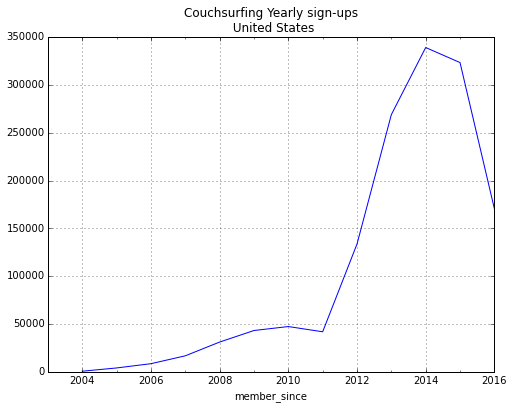

In [17]:
cs_year_roll.plot(title="Couchsurfing Yearly sign-ups\n United States", figsize=(8,6))

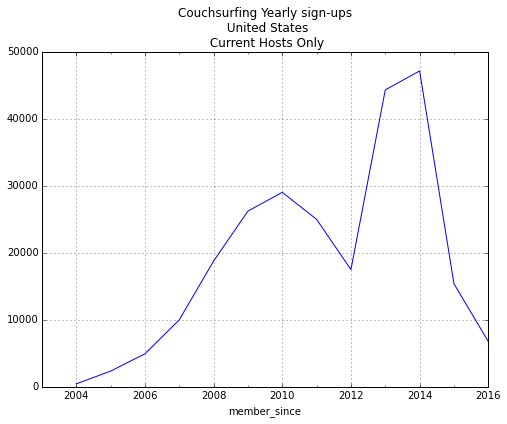

In [18]:
cs_year_roll_defhosts.plot(title="Couchsurfing Yearly sign-ups\n United States\n Current Hosts Only", figsize=(8,6))

In [19]:
ab_since_year = ab_since_global.groupby(by=lambda x: x.year).agg(sum)
ab_since_year_refver = ab_since_global_refver.groupby(by=lambda x: x.year).agg(sum)
cs_since_year = pandas.DataFrame(cs_since_global.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts = pandas.DataFrame(cs_since_global_defhosts.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_2013mean = pandas.DataFrame(cs_since_global_2013mean.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts_refver = pandas.DataFrame(cs_since_global_defhosts_refver.groupby(by=lambda x: x.year).agg(sum)['people_id'])

In [20]:
ab_since_year.columns = ['signups']
ab_since_year_refver.columns = ['signups']
cs_since_year.columns = ['signups']
cs_since_year_defhosts.columns = ['signups']
cs_since_year_2013mean.columns = ['signups']
cs_since_year_defhosts_refver.columns = ['signups']

In [21]:
abcs = ab_since_year.join(cs_since_year,how='outer',lsuffix='_ab', rsuffix='_cs')
abcs_all= abcs.join(cs_since_year_defhosts, rsuffix='_cs_definitehosts')
abcs_defhost = ab_since_year.join(cs_since_year_defhosts,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts')
abcs_2013mean = ab_since_year.join(cs_since_year_2013mean,how='outer',lsuffix="_ab", rsuffix='_cs_2013mean')
abcs_defhost_refver = ab_since_year.join(cs_since_year_defhosts_refver,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts_refver')
abcs_both_refver = ab_since_year_refver.join(cs_since_year_defhosts_refver,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts_refver')

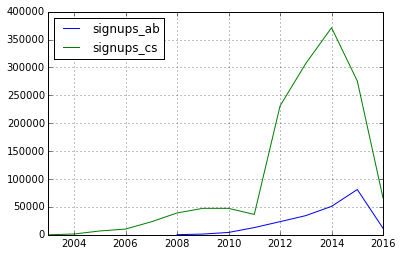

In [22]:
abcs.plot()

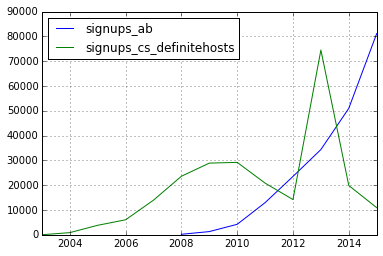

In [23]:
abcs_defhost.ix[:2015].plot()

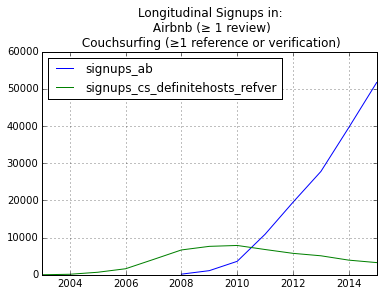

In [24]:
abcs_both_refver.ix[:2015].plot(title='Longitudinal Signups in:\n Airbnb (≥ 1 review)\n Couchsurfing (≥1 reference or verification)')

In [25]:
abcs_r = abcs_both_refver.reset_index()

In [26]:
%Rpush abcs_r

/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Saving 8.33 x 5.56 in image

  res = super(Function, self).__call__(*new_args, **new_kwargs)


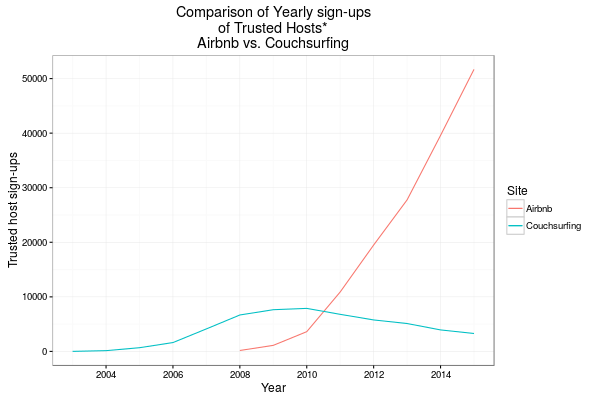

In [203]:
%%R -w 600 -h 400
yrs = c(2002,2004,2006,2008,2010,2012,2014, 2016)
p = ggplot(abcs_r, aes(index)) + 
        geom_line(aes(y=signups_ab, colour="signups_ab")) + 
        geom_line(aes(y=signups_cs_definitehosts_refver, colour="signups_cs_definitehosts_refver"))+
        xlab("Year")+
        ylab("Trusted host sign-ups")+
        ggtitle("Comparison of Yearly sign-ups\n of Trusted Hosts* \nAirbnb vs. Couchsurfing")+
        scale_colour_discrete(name="Site",
                         labels=c("Airbnb", "Couchsurfing"))+
        scale_x_continuous(breaks=yrs, limits=c(2003,2015))+
        theme_bw()
ggsave('figs/signup_comp.png', dpi=300)
print(p)
                

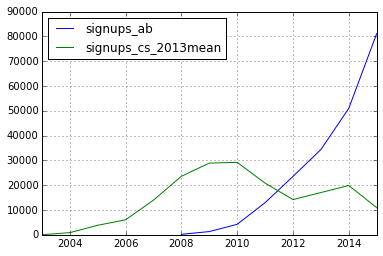

In [28]:
abcs_2013mean.ix[:2015].plot()

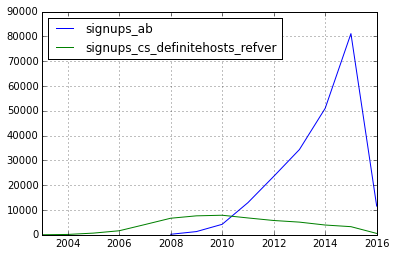

In [29]:
abcs_defhost_refver.plot()

In [30]:
abcs_both_refver.fillna(0, inplace=True)

signups - defintiely host, signups_cs - includes maybe accepting. No 2013 adjustment

In [31]:
abcs_all.corr()

,signups_ab,signups_cs,signups
signups_ab,1.000000,0.814058,-0.053600
signups_cs,0.814058,1.000000,0.478641
signups,-0.053600,0.478641,1.000000


In [32]:
abcs_2013mean.ix[2008:2015].corr()

,signups_ab,signups_cs_2013mean
signups_ab,1.000000,-0.797019
signups_cs_2013mean,-0.797019,1.000000


In [33]:
abcs_defhost_refver.ix[2008:2015].corr()

,signups_ab,signups_cs_definitehosts_refver
signups_ab,1.000000,-0.950764
signups_cs_definitehosts_refver,-0.950764,1.000000


In [34]:
abcs_both_refver.corr()

,signups_ab,signups_cs_definitehosts_refver
signups_ab,1.000000,0.134996
signups_cs_definitehosts_refver,0.134996,1.000000


In [35]:
abcs_both_refver.ix[2008:2015]

,signups_ab,signups_cs_definitehosts_refver
2008,173,6679
2009,1114,7646
2010,3621,7887
2011,10898,6796
2012,19499,5769
2013,27776,5111
2014,39586,3942
2015,51692,3281


BY CITY
========

In [36]:
state_dict = dict( (('Alabama', 'AL'),
       ('Alaska', 'AK'),
       ('Arizona', 'AZ'),
       ('Arkansas', 'AR'),
       ('California', 'CA'),
       ('Colorado', 'CO'),
       ('Connecticut', 'CT'),
       ('Delaware', 'DE'),
       ('District of Columbia', 'DC'),
       ('Florida', 'FL'),
       ('Georgia', 'GA'),
       ('Hawaii', 'HI'),
       ('Idaho', 'ID'),
       ('Illinois', 'IL'),
       ('Indiana', 'IN'),
       ('Iowa', 'IA'),
       ('Kansas', 'KS'),
       ('Kentucky', 'KY'),
       ('Louisiana', 'LA'),
       ('Maine', 'ME'),
       ('Maryland', 'MD'),
       ('Massachusetts', 'MA'),
       ('Michigan', 'MI'),
       ('Minnesota', 'MN'),
       ('Mississippi', 'MS'),
       ('Missouri', 'MO'),
       ('Montana', 'MT'),
       ('Nebraska', 'NE'),
       ('Nevada', 'NV'),
       ('New Hampshire', 'NH'),
       ('New Jersey', 'NJ'),
       ('New Mexico', 'NM'),
       ('New York', 'NY'),
       ('North Carolina', 'NC'),
       ('North Dakota', 'ND'),
       ('Ohio', 'OH'),
       ('Oklahoma', 'OK'),
       ('Oregon', 'OR'),
       ('Pennsylvania', 'PA'),
       ('Rhode Island', 'RI'),
       ('South Carolina', 'SC'),
       ('South Dakota', 'SD'),
       ('Tennessee', 'TN'),
       ('Texas', 'TX'),
       ('Utah', 'UT'),
       ('Vermont', 'VT'),
       ('Virginia', 'VA'),
       ('Washington', 'WA'),
       ('West Virginia', 'WV'),
       ('Wisconsin', 'WI'),
       ('Wyoming', 'WY')) )

def state_lookup(s):

    if len(s) ==2:
        return s.lower()
    else:
        try:
            return state_dict[s].lower()
        except KeyError:
            print(s)
            return float('nan')

In [37]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439277

In [38]:
print(len(cs_df_defhosts_refver))
cs_df_defhosts_refver.dropna(inplace=True)
print(len(cs_df_defhosts_refver))

54258
54018


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [39]:
cs_df.head()

,city,member_since,people_id,state,status,verified_status,references_int
0,Wadley,2009-01-01,/people/stopsmoking384,AL,Accepting Guests,Not Verified,0
1,Adamsville,2013-01-01,/people/randolphposey,AL,Accepting Guests,Not Verified,0
2,Graysville,2012-01-01,/people/bart4,AL,Maybe Accepting Guests,Not Verified,0
3,Abbeville,2012-01-01,/people/benia.acoose,Alabama,Maybe Accepting Guests,Not Verified,0
4,Abbeville,2009-01-01,/people/krsmrsh14,Alabama,Accepting Guests,Not Verified,0


In [40]:
cs_df['state'] = cs_df['state'].map(state_lookup)
cs_df['city'] = cs_df['city'].apply(lambda x: x.strip().lower())
cs_df.dropna(inplace=True)
cs_df['state'] = cs_df['state'].apply(lambda x: x.strip().lower())
cs_df['citystate'] = cs_df['city'] + '_' + cs_df['state']
cs_df['year'] = cs_df['member_since'].apply(lambda x: x.year)

Attica
Littoral
Taiwan
Colorado

Tasman
Iran
Milwaukee
Minas Gerais


In [41]:
cs_df_defhosts_refver['city']

147       Pelham
158    Alabaster
220       Pelham
381       Oxford
399    Andalusia
409    Andalusia
430         Arab
484     Ashville
487       Athens
851       Auburn
928       Auburn
929       Auburn
930       Auburn
931       Auburn
933       Auburn
...
1462644             Houston
1462646             Madison
1462649            Sarasota
1462650             Atlanta
1462652         Los Angeles
1462653             Seattle
1462654           Fairbanks
1462655         Little Rock
1462659               Fargo
1462664         Chapel Hill
1462665            New York
1462668            New York
1462669            New York
1462670    Livingston Manor
1462672            New York
Name: city, Length: 54018, dtype: object

In [42]:
cs_df_defhosts_refver['state'] = cs_df_defhosts_refver['state'].map(state_lookup)
cs_df_defhosts_refver['city'] = cs_df_defhosts_refver['city'].apply(lambda x: x.strip().lower())
cs_df_defhosts_refver['state'] = cs_df_defhosts_refver['state'].apply(lambda x: x.strip().lower())
cs_df_defhosts_refver['citystate'] = cs_df_defhosts_refver['city'] + '_' + cs_df_defhosts_refver['state']
cs_df_defhosts_refver['year'] = cs_df_defhosts_refver['member_since'].apply(lambda x: x.year)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentatio

In [43]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [44]:
cs_df_all = cs_df[['citystate','year','people_id']]
cs_df_definite = cs_df[cs_df['status'] == 'Accepting Guests'][['citystate','year','people_id']]

In [45]:
cs_citystate = cs_df_definite.groupby(by=['citystate','year']).agg(len)

In [46]:
len(cs_df_defhosts_refver)

54018

In [47]:
cs_df_defhosts_refver.to_csv('cleaned csv/cs_defhosts_refver.csv',columns=['people_id','year','citystate'])

In [48]:
cs_df_defhosts_refver_selectcol = cs_df_defhosts_refver[['citystate','year','people_id']]
cs_citystate_refver = cs_df_defhosts_refver_selectcol.groupby(by=['citystate','year']).agg(len)

In [49]:
cs_citystate_refver.columns = ['signups']

# Average out the 2013 anomaly

In [50]:
cs_citystate.columns = ['signups']

In [51]:
cs_citystate.unstack()['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    74461
2014    19811
2015    10563
2016     2480
dtype: float64

In [52]:
cs_citystate_unstacked = cs_citystate.unstack()
cs_citystate_unstacked.fillna(0, inplace=True)
mean2013 = (cs_citystate_unstacked['signups'][2012] +  cs_citystate_unstacked['signups'][2014]) /2

In [53]:
mean2013.sum()

16991.0

In [54]:
cs_citystate_2013mean = cs_citystate_unstacked.copy()

In [55]:
cs_citystate_2013mean.columns

MultiIndex(levels=[['signups'], [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
           names=[None, 'year'])

In [56]:
cs_citystate_2013mean.loc[:,('signups',2013)] = mean2013

In [57]:
cs_citystate_2013mean['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    16991
2014    19811
2015    10563
2016     2480
dtype: float64

In [58]:
ab_loc = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','city','state','number_of_reviews'])
hosts_loc = ab_df.groupby(by='host_id',as_index=True).agg(min)

ab_refver = ab_loc[ab_loc['number_of_reviews']>=1]


In [59]:
print(len(ab_loc))
ab_loc.dropna(inplace=True)
print(len(ab_loc))

print(len(ab_refver))
ab_refver.dropna(inplace=True)
print(len(ab_refver))

337213
336140
224161
223540


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
ab_loc['city'] = ab_loc['city'].apply(lambda x: x.strip().lower())
ab_loc['state'] = ab_loc['state'].apply(lambda x: x.strip().lower())
ab_loc['citystate'] = ab_loc['city'] + '_' + ab_loc['state']
ab_loc['host_since'] = ab_loc['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_loc['year'] = ab_loc['host_since'].apply(lambda x: x.year)

In [61]:
ab_refver['city'] = ab_refver['city'].apply(lambda x: x.strip().lower())
ab_refver['state'] = ab_refver['state'].apply(lambda x: x.strip().lower())
ab_refver['citystate'] = ab_refver['city'] + '_' + ab_refver['state']
ab_refver = ab_refver[(ab_refver['city'] != ab_refver['state']) & (ab_refver['state'] != 'puerto rico')]# notpuerto rico
ab_refver['host_since'] = ab_refver['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_refver['year'] = ab_refver['host_since'].apply(lambda x: x.year)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentatio

In [62]:
ab_refver.to_csv('cleaned csv/ab_hosts_refver.csv')

In [63]:
ab_loc = ab_loc[['citystate','year','host_id']]
ab_citystate = ab_loc.groupby(by=['citystate','year']).agg(len)

ab_refver = ab_refver[['citystate','year','host_id']]
ab_citystate_refver = ab_refver.groupby(by=['citystate','year']).agg(len)

In [64]:
ab_citystate.columns = ['signups']
ab_citystate_refver.columns = ['signups']

In [65]:
abcs_citystate = pandas.merge(cs_citystate, ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_2013mean = pandas.merge(cs_citystate_2013mean.stack(), ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_refver = pandas.merge(cs_citystate_refver, ab_citystate_refver, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))


In [66]:
abcs_citystate.ix['mountain view_ca']

,signups_cs,signups_ab
year,,
2005,1,NaN
2006,3,NaN
2007,14,NaN
2008,19,1
2009,25,26
2010,15,25
2011,21,98
2012,15,75
2013,75,143


In [67]:
abcs_citystate.fillna(0, inplace=True)
abcs_citystate_2013mean.fillna(0, inplace=True)
abcs_citystate_refver.fillna(0, inplace=True)

In [68]:
cs_cum = abcs_citystate.unstack()['signups_cs'].sum(axis=1)
cs_cum_2013mean = abcs_citystate_2013mean.unstack()['signups_cs'].sum(axis=1)
ab_cum = abcs_citystate.unstack()['signups_ab'].sum(axis=1)

cs_cum_refver = abcs_citystate_refver.unstack()['signups_cs'].sum(axis=1)
ab_cum_refver = abcs_citystate_refver.unstack()['signups_ab'].sum(axis=1)

In [69]:
abcs_cum_refver = pandas.DataFrame.from_records([cs_cum_refver,ab_cum_refver]).T
abcs_cum_refver.columns = ['signups_cs','signups_ab']

In [70]:
abcs_cum_refver['citystate_matched'] = abcs_cum_refver.all(axis=1)

In [71]:
len(abcs_cum_refver[abcs_cum_refver['citystate_matched']==True])

4606

In [72]:
abcs_cum_refver[abcs_cum_refver['citystate_matched']==False].sort('signups_cs', ascending=False)

,signups_cs,signups_ab,citystate_matched
citystate,,,
winston salem_nc,34,0,False
bowling green_oh,28,0,False
murray_ky,17,0,False
edwardsville_il,13,0,False
lees summit_mo,10,0,False
allendale_mi,10,0,False
meadville_pa,9,0,False
chevy chase village_md,8,0,False
hilliard_oh,8,0,False


In [73]:
'east' in abcs_cum_refver[abcs_cum_refver['signups_cs'] > 1].index

False

In [74]:
abcs_cum_refver['signups_ab'].sum()

221705.0

In [75]:
print('all the hosts')
ah = abcs_cum_refver.sum().sum()
print(ah)
print('all the hosts in cities that dont cross site match')
um = abcs_cum_refver[abcs_cum_refver['citystate_matched']==False].sum().sum()
print(um)
print('percent remaining after matching')
print((ah-um) / ah)

all the hosts
280329.0
all the hosts in cities that dont cross site match
26763.0
percent remaining after matching
0.904530034352


In [76]:
dual_min = 100
big_cities = abcs_citystate.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities = abcs_citystate.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]
big_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]

In [77]:
dual_min_refver = 1
big_cities_refver = abcs_citystate_refver.unstack().ix[ab_cum_refver >=dual_min_refver].ix[cs_cum_refver >=dual_min_refver]
small_cities_refver = abcs_citystate_refver.unstack().ix[ab_cum_refver <dual_min_refver].ix[cs_cum_refver <dual_min_refver]

# City Size in General, Correlations

In [78]:
big_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.483983
signups_ab,0.483983,1.000000


In [79]:
small_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,-0.028088
signups_ab,-0.028088,1.000000


In [80]:
big_cities_2013mean.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.480205
signups_ab,0.480205,1.000000


In [81]:
small_cities_2013mean.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.111111
signups_ab,0.111111,1.000000


In [82]:
big_cities_refver.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.495994
signups_ab,0.495994,1.000000


In [83]:
small_cities_refver.stack().corr()

,signups_cs,signups_ab
signups_cs,NaN,NaN
signups_ab,NaN,NaN


# City Size Graphs 2013-spikey

In [84]:
%%capture
big_cities_groups = big_cities.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# Big Cities, with 1 References Verification Cutoff

# Top and Bottom 10 Cities by Host Signup Correlation
st george_ut 1.0
                   signups_cs  signups_ab
citystate    year                        
st george_ut 2013           0           1
             2015           2           8
floral park_ny 1.0
                     signups_cs  signups_ab
citystate      year                        
floral park_ny 2012           0           1
               2014           1           2
               2015           1           2
forest_va 1.0
                signups_cs  signups_ab
citystate year                        
forest_va 2013           1           6
          2014           0           1
          2015           1           6
clark fork_id 1.0
                    signups_cs  signups_ab
citystate     year                        
clark fork_id 2011           0           1
              2015           1           2
fortuna_ca 1.0
                 signups_cs  signups_ab
citystate  year                        
fortuna_ca 2012           1 

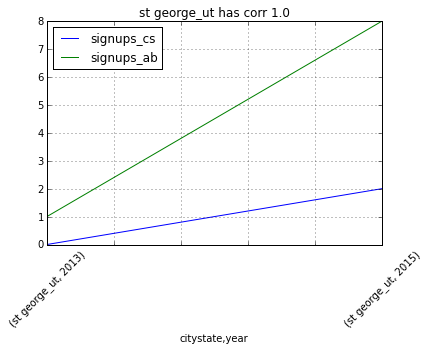

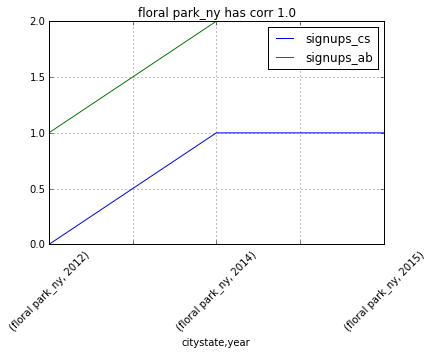

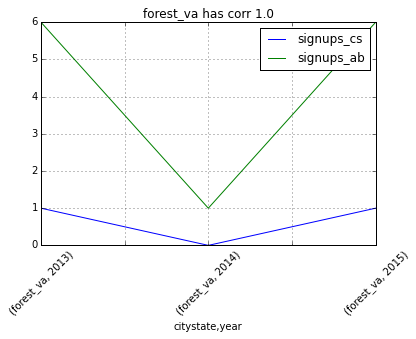

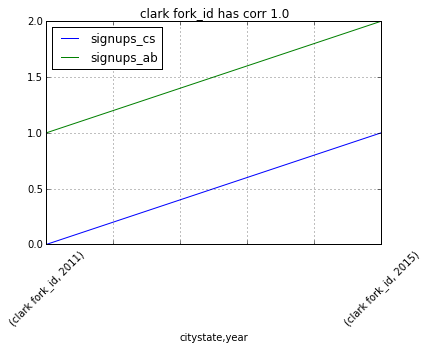

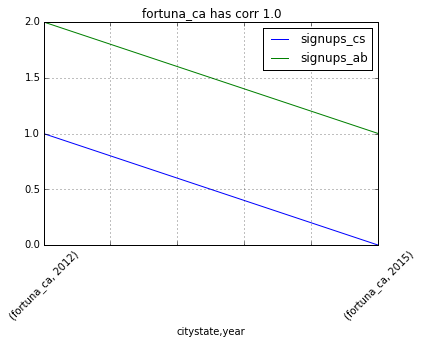

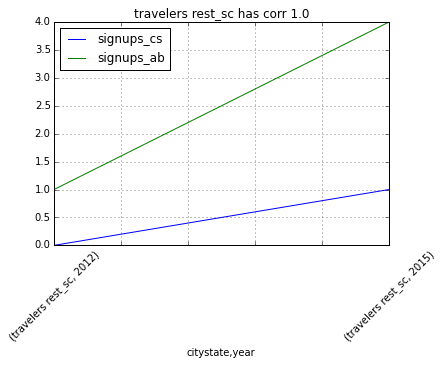

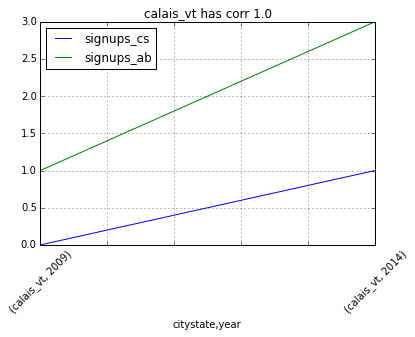

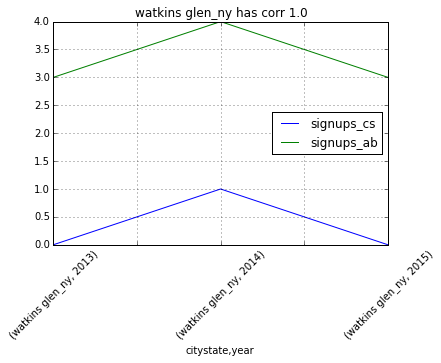

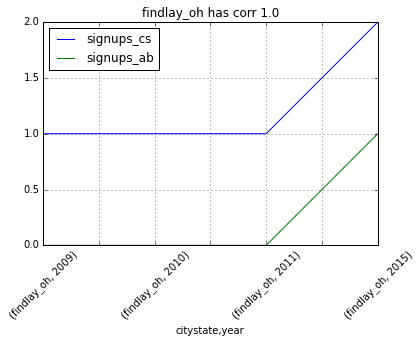

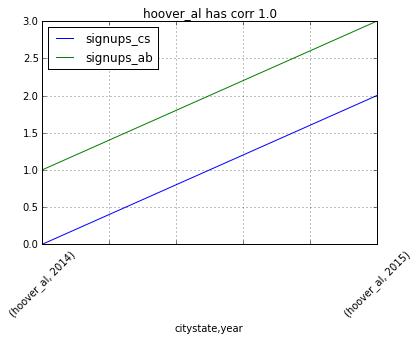

In [85]:
big_cities_groups_refver = big_cities_refver.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups_refver.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_corr_refver.dropna(inplace=True)
big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:10,]
big_cities_bottom= big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-10:,]

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_bottom.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups_refver:
        if city==dfcity:
            print(df)
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)


In [86]:
cities = big_cities_refver.stack().reset_index()

In [87]:
gcities = ['minneapolis_mn','new york_ny','seattle_wa','san francisco_ca','washington_dc']
gc = cities[cities['citystate'].apply(lambda x: x in gcities)]

In [211]:
gc.replace(to_replace=0, value=float('nan'), inplace=True)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [89]:
df_test = gc.iloc[:50]

In [212]:
%Rpush gc

[1] "Minneapolis"     "New York City"   "San Francisco"   "Seattle"        
[5] "Washington D.C."


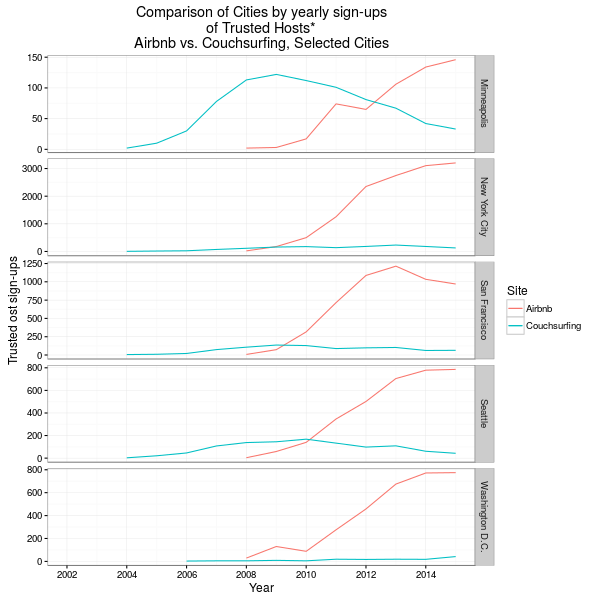

In [215]:
%%R -w 600 -h 600
print(levels(gc$citystate))
#[1] "minneapolis_mn"   "new york_ny"      "san francisco_ca" "seattle_wa" [5] "washington_dc"   

levels(gc$citystate) <- c("Minneapolis", "New York City", "San Francisco", "Seattle", "Washington D.C.")
yrs = c(2002,2004,2006,2008,2010,2012,2014, 2016)
gp = ggplot(gc, aes(year)) + 
        facet_grid(citystate ~ ., scales = "free") +
        geom_line(aes(y=signups_ab, colour="signups_ab")) + 
        geom_line(aes(y=signups_cs, colour="signups_cs"))+
        xlim(2002,2015)+
        xlab("Year")+
        ylab("Trusted ost sign-ups")+
        ggtitle("Comparison of Cities by yearly sign-ups\n of Trusted Hosts* \nAirbnb vs. Couchsurfing, Selected Cities")+
        scale_colour_discrete(name="Site",
                         labels=c("Airbnb", "Couchsurfing"))+
        scale_x_continuous(breaks=yrs, limits=c(2002,2015))+
        theme_bw()
ggsave('figs/cities_comp.png', dpi=300)
print(gp)

# Load Census Data

In [92]:
census_income = pandas.read_csv('geographic/nhgis0005_csv/nhgis0005_ds206_20145_2014_place.csv',encoding = "ISO-8859-1",usecols=['STATE','PLACE','ABDPE001','GISJOIN'])
census_income.columns = ['gisjoin', 'state', 'place', 'income']

census_pop = pandas.read_csv('geographic/nhgis0006_csv/nhgis0006_ds206_20145_2014_place.csv', encoding = "ISO-8859-1", usecols=['STATE','PLACE','ABA1E001','GISJOIN'])
census_pop.columns = ['gisjoin','state','place','pop']

popinc = pandas.merge(census_income, census_pop[['gisjoin','pop']], left_on='gisjoin', right_on='gisjoin')

In [93]:
popinc.head()

,gisjoin,state,place,income,pop
0,G01000100,Alabama,Abanda CDP,27989,43
1,G01000124,Alabama,Abbeville city,27989,2654
2,G01000460,Alabama,Adamsville city,46005,4472
3,G01000484,Alabama,Addison town,38194,913
4,G01000676,Alabama,Akron town,22813,302


In [94]:
%%capture
popinc['state_abbr'] = popinc['state'].apply(state_lookup)

In [95]:
census_abcs_map = {'Athens-Clarke County unified government (balance)': 'athens',
               'Augusta-Richmond County consolidated government (balance)':'augusta',
               'Boise City city':'boise',
               'East Honolulu CDP':'honolulu',
               'Indianapolis city (balance)':'indianapolis',
               'Lexington-Fayette urban county':'lexington',
               'Louisville/Jefferson County metro government (balance)':'louisville',
               'Nashville-Davidson metropolitan government (balance)':'nashville',
               'St. Augustine city': 'saint augustine',
               'St. Louis city':'saint louis',
               'St. Paul city':'saint paul',
               'St. Petersburg city':'saint petersburg',
               'San Buenaventura (Ventura) city':'ventura',
               'Kailua CDP (Hawaii County)':'kailua-kona',
                'South Lake Tahoe city':'south lake tahoe',
                'Kailua CDP (Honolulu County)':'kailua',
                  'El Paso de Robles (Paso Robles) city':'paso robles',
                  'St. Louis city': 'st. louis',
                  'Yosemite Lakes CDP':'yosemite national park',
                  'Barnstable Town city':'barnstable',
                  'Carmel Valley Village CDP':'carmel',
                  'Sunnyside-Tahoe City CDP':'tahoe city'}

missing_data = {'brooklyn_ny':{'pop':2504700,'income':46085},
               'queens_ny':{'pop':2230722,'income':57001},
               'venice_ca':{'pop':40605,'income':67909},
                'bronx_ny':{'pop':1385108,'income':34388},
                'astoria_ny':{'pop':154000,'income':57001},
                'staten island_ny':{'pop':468730,'income':72569},
                'weehawken_nj':{'pop':634266,'income':58442},
                'long island city_ny':{'pop':68117,'income':57001},
                'olympic valley_ca':{'pop':348432,'income':72725},
                'la jolla_ca':{'pop':42017,'income':72962},
               'wellfleet_ma':{'pop':2750,'income':43558},
                'killington_vt':{'pop':811,'income':47500},
               'saint louis_mo':{'pop':319294,'income':29156},
                'north hollywood_ca':{'pop':77848,'income':42791},
                'north bergen_nj':{'pop':60773,'income':29626},
                'princeton_nj':{'pop':28572,'income':107071},
                'eastsound_wa':{'pop':15769,'income':43491},
                'waimea_hi':{'pop':9212 , 'income':51150 },
                'santa rosa beach_fl':{'pop':55043 , 'income':32407 },
                'eastham_ma':{'pop':4956 , 'income':42618 },
                'watertown_ma':{'pop':31915, 'income':59764 },
                'amherst_ma':{'pop': 37819, 'income':40017 }
               }

def norm_place(s):
    try:
        return census_abcs_map[s]
    except KeyError:
        end = s.split(" ")[-1]
        if end in ['city','CDP','town','village', 'borough', 'municipality']:
            snorm = ' '.join(s.split(' ')[:-1])
            return snorm.lower()
        else:
            return s

In [96]:
popinc['place_norm'] = popinc['place'].apply(norm_place)

In [97]:
popinc['citystate'] = popinc['place_norm'] + '_' + popinc['state_abbr']

In [98]:
popinc = popinc[['citystate', 'pop','income']]

In [99]:
popinc.head()

,citystate,pop,income
0,abanda_al,43,27989
1,abbeville_al,2654,27989
2,adamsville_al,4472,46005
3,addison_al,913,38194
4,akron_al,302,22813


In [100]:
popinc_clean = popinc.dropna()

In [101]:
len(popinc_clean)

28512

In [102]:
popinc_sorted = popinc_clean.sort(['citystate','income'])

In [103]:
popinc_sorted[popinc_sorted['citystate']=='santa rosa_tx']

,citystate,pop,income
25930,santa rosa_tx,130,16250
25929,santa rosa_tx,2881,20500


In [104]:
popinc_sorted.drop_duplicates(subset='citystate',take_last=False,inplace=True)

In [105]:
popinc_missing = pandas.DataFrame.from_dict(missing_data,orient='index')

In [106]:
popinc_missing['citystate'] = popinc_missing.index

In [107]:
popinc_combined = popinc_sorted.append(popinc_missing, ignore_index=True)

In [108]:
abcs_census_corr = pandas.merge(big_cities_corr_refver,popinc_combined, how='inner', left_index=True, right_on='citystate')

In [109]:
#these are the missing ones
missing = list(big_cities_corr_refver.index - abcs_census_corr['citystate'])

In [110]:
#small_census_df = census_df[['ABDPE001','citystate']]
#small_census_df.columns = ['income','citystate']
#small_census_df.to_csv('census_income.csv')

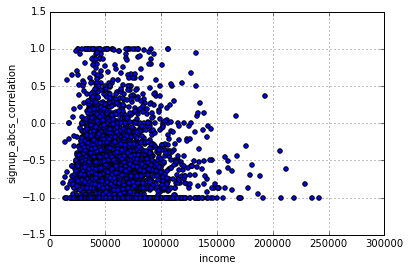

In [111]:
abcs_census_corr.plot(y= 'signup_abcs_correlation', x='income', kind='scatter')

In [112]:
#pandas.stats.ols.OLS(abcs_census['income'], abcs_census['signup_abcs_correlation'])

In [113]:
big_cities_size = big_cities_groups_refver.agg(sum)

In [114]:
abcs_census_size = pandas.merge(big_cities_size,popinc_combined, how='inner', left_index=True, right_on='citystate')

In [115]:
missing_cities = list(set(big_cities_size.index) - set(abcs_census_size['citystate']))

In [116]:
missing_cities_df = big_cities_size.ix[missing_cities].sort('signups_ab', ascending=False)
missing_cities_top = missing_cities_df[:20]
missing_cities_top_size = missing_cities_top.sum().sum()
print(missing_cities_top_size)

947.0


In [117]:
missing_cities_top

,signups_cs,signups_ab
citystate,,
st petersburg_fl,11,57
warren_vt,1,57
carmel valley_ca,1,51
harwich_ma,1,50
narragansett_ri,5,48
flushing_ny,5,47
homewood_ca,1,47
yarmouth_ma,1,44
bushkill_pa,1,43


In [118]:
print('number of hosts in abcs merged dataset')
bcs=big_cities_size.sum().sum()
print(bcs)
print('number of hosts that dont have income data after merging with census')
bccs = abcs_census_size[['signups_cs','signups_ab']].fillna(0).sum().sum()
print(bcs - bccs)
print('as a percent')
print(bccs/bcs)
print('top missing cities contribute')
print(missing_cities_top_size)

number of hosts in abcs merged dataset
248960.0
number of hosts that dont have income data after merging with census
6658.0
as a percent
0.973256748072
top missing cities contribute
947.0


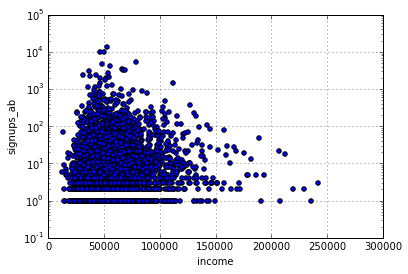

In [119]:
abcs_census_size.plot(x='income', y='signups_ab', kind='scatter')
plt.yscale('log')

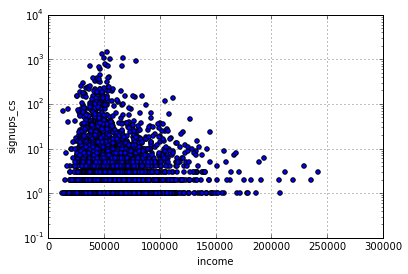

In [120]:
abcs_census_size.plot(x='income', y='signups_cs', kind='scatter')
plt.yscale('log')

In [121]:
abcs_census_size['ratio'] = abcs_census_size['signups_cs'] / abcs_census_size['signups_ab']
abcs_census_size['interaction'] = abcs_census_size['signups_ab'] * abcs_census_size['income']

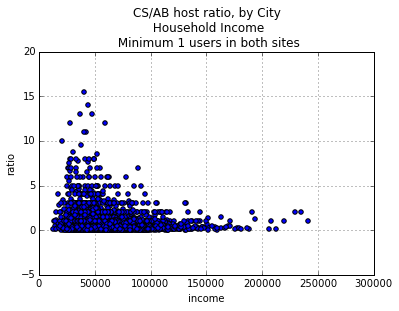

In [122]:
abcs_census_size.plot(x='income', y='ratio', kind='scatter', title='CS/AB host ratio, by City \n Household Income \n Minimum {} users in both sites'.format(dual_min_refver))

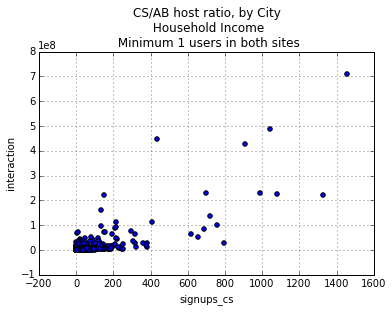

In [123]:
abcs_census_size.plot(x='signups_cs', y='interaction', kind='scatter', title='CS/AB host ratio, by City \n Household Income \n Minimum {} users in both sites'.format(dual_min_refver))

In [124]:
median_income = abcs_census_size['income'].median()

In [125]:
median_income

50666.5

In [126]:
abcs_census_size['high_inc'] = abcs_census_size['income'].apply(lambda x: x > median_income)

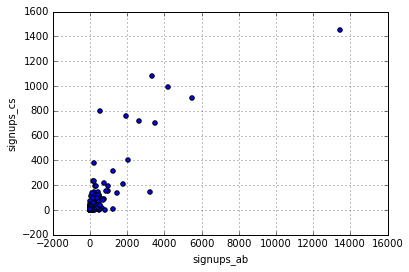

In [127]:
abcs_census_size[abcs_census_size['high_inc']==True].plot(x='signups_ab',y='signups_cs',kind='scatter')

In [128]:
abcs_census_size.head()

,signups_cs,signups_ab,citystate,income,pop,ratio,interaction,high_inc
133,1,2,abbeville_la,28939,12341,0.500000,57878,False
147,3,9,aberdeen_nc,38721,6702,0.333333,348489,False
149,13,1,aberdeen_sd,47540,26979,13.000000,47540,False
150,2,5,aberdeen_wa,39735,16544,0.400000,198675,False
155,14,6,abilene_tx,42766,120776,2.333333,256596,False


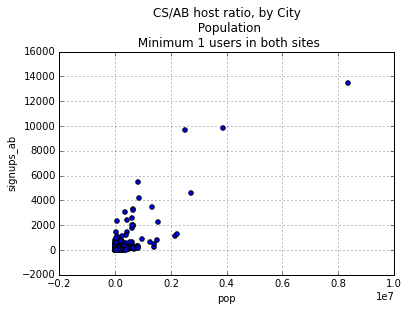

In [129]:
abcs_census_size.plot(x='pop', y='signups_ab', kind='scatter', title='CS/AB host ratio, by City \n Population \n Minimum {} users in both sites'.format(dual_min_refver))

In [130]:
pandas.stats.ols.OLS(abcs_census_size['ratio'], abcs_census_size['income'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         3884
Number of Degrees of Freedom:   2

R-squared:         0.0143
Adj R-squared:     0.0140

Rmse:              1.1685

F-stat (1, 3882):    56.2525, p-value:     0.0000

Degrees of Freedom: model 1, resid 3882

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0000     0.0000      -7.50     0.0000    -0.0000    -0.0000
     intercept     1.1615     0.0461      25.18     0.0000     1.0711     1.2519
---------------------------------End of Summary---------------------------------

# Mutliple Linear Regression Mixed Effects

In [131]:
popinc_description = popinc_combined.describe()
inc25, inc50, inc75, inc100 = popinc_description.ix['25%']['income'], \
                              popinc_description.ix['50%']['income'], \
                              popinc_description.ix['75%']['income'], \
                              popinc_description.ix['max']['income']
def quartile(inc):
    if inc < inc25:
        return 'a'
    elif inc < inc50:
        return 'b'
    elif inc < inc75:
        return 'c'
    elif inc <= inc100:
        return 'd'

In [132]:
popinc_description

,income,pop
count,28442.000000,28442.000000
mean,50346.508227,8485.692638
std,25261.944075,71600.279898
min,2499.000000,4.000000
25%,34754.250000,367.000000
50%,44442.500000,1153.000000
75%,58488.250000,4277.250000
max,250001.000000,8354889.000000


In [133]:
popinc_combined['quartile'] = popinc_combined['income'].apply(lambda x: quartile(x))

In [134]:
abcs_citystate_refver_flat = abcs_citystate_refver.reset_index()

In [135]:
abcs_citystate_refver_flat = abcs_citystate_refver_flat[(abcs_citystate_refver_flat['year']>=2008) & (abcs_citystate_refver_flat['year']<=2015)]

In [136]:
abcs_popinc = pandas.merge(abcs_citystate_refver_flat, popinc_combined, how='inner', left_on='citystate', right_on='citystate')

In [137]:
abcs_popinc.head()

,citystate,year,signups_cs,signups_ab,income,pop,quartile
0,abbeville_la,2009,1,0,28939,12341,a
1,abbeville_la,2012,0,1,28939,12341,a
2,abbeville_la,2013,0,1,28939,12341,a
3,abbeville_sc,2015,1,0,19869,5207,a
4,aberdeen_md,2012,1,0,50327,15137,c


In [138]:
abcs_popinc.to_csv('cleaned csv/abcs_popinc.csv')

In [139]:
citystate_inc = abcs_popinc[['citystate','signups_cs','signups_ab','pop', 'quartile','income']].groupby(by='citystate').agg({'signups_cs':sum,'signups_ab':sum, 'pop':min,'quartile':min,'income':min})

In [140]:
citystate_inc['cs_thou'] = (citystate_inc['signups_cs'] / citystate_inc['pop'] ) *1000
citystate_inc['ab_thou'] = (citystate_inc['signups_ab'] / citystate_inc['pop']) *1000

In [141]:
citystate_inc['csab_ratio'] = citystate_inc['signups_cs'] / citystate_inc['signups_ab']
citystate_inc['abcs_ratio'] = citystate_inc['signups_ab'] / citystate_inc['signups_cs']

In [142]:
citystate_inc['pop'].max()

8354889

In [179]:
len(citystate_inc)

8841

In [143]:
%Rpush abcs_popinc
%Rpush citystate_inc

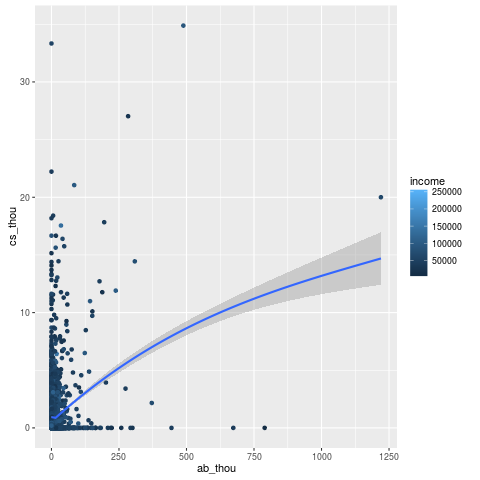

In [248]:
%%R

tp = ggplot(citystate_inc, aes(x=ab_thou, y=cs_thou, colour=income)) + 
geom_point() + geom_smooth()
print(tp)

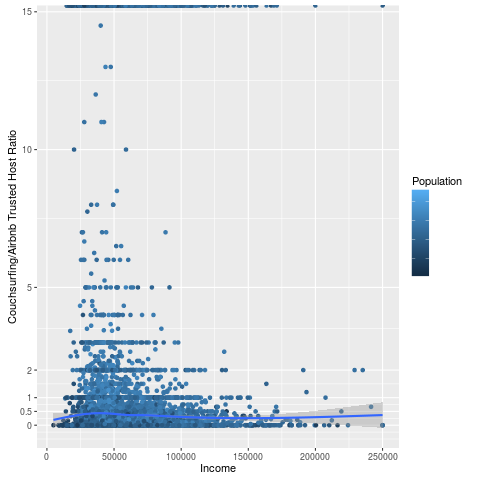

In [250]:
%%R 

rp = ggplot(citystate_inc, aes(x=income, y=csab_ratio, colour=pop)) + 
geom_point()+
scale_colour_continuous(trans="log")+
ylab("Couchsurfing/Airbnb Trusted Host Ratio")+
scale_y_continuous(breaks = c(0,0.5,1,2,5,10,15), labels = c(0,0.5,1,2,5,10,15)) +
xlab("Income")+
guides(colour=guide_colorbar(label=FALSE, title="Population"))+
geom_smooth()
ggtitle("Host Ratio by Income")
ggsave("figs/host_ratio.png",dpi=300)
print(rp)

In [146]:
%%R
crowd.fe = plm(signups_cs ~ signups_ab, index=c("citystate","year"), data=abcs_popinc, model="within")
print(summary(crowd.fe))
print(stargazer(crowd.fe, title="Regression Results", align=TRUE))

Oneway (individual) effect Within Model

Call:
plm(formula = signups_cs ~ signups_ab, data = abcs_popinc, model = "within", 
    index = c("citystate", "year"))

Unbalanced Panel: n=8841, T=1-8, N=25873

Residuals :
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-85.700  -0.333   0.000   0.252  92.000 

Coefficients :
              Estimate  Std. Error t-value  Pr(>|t|)    
signups_ab -0.02224096  0.00044848 -49.592 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    160110
Residual Sum of Squares: 139900
R-Squared:      0.12618
Adj. R-Squared: 0.083061
F-statistic: 2459.36 on 1 and 17031 DF, p-value: < 2.22e-16

% Table created by stargazer v.5.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, May 13, 2016 - 11:59:46 AM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Regression Results} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} } 
\\[-1.8ex]

In [256]:
%%R
abcs_popinc$pred <- plm:::predict.plm(crowd.fe, abcs_popinc)


Error in crossprod(beta, t(X)) : non-conformable arguments


In [148]:
%R head(abcs_popinc[abcs_popinc["quartile"]=="b",])

,citystate,year,signups_cs,signups_ab,income,pop,quartile
5,aberdeen_nc,2008,1,0,38721,6702,b
6,aberdeen_nc,2011,1,1,38721,6702,b
7,aberdeen_nc,2012,0,1,38721,6702,b
8,aberdeen_nc,2013,0,2,38721,6702,b
9,aberdeen_nc,2014,0,2,38721,6702,b
10,aberdeen_nc,2015,0,3,38721,6702,b


In [297]:
%%R
abcs_popinc_a = abcs_popinc[abcs_popinc["quartile"]=="a",]
abcs_popinc_b = abcs_popinc[abcs_popinc["quartile"]=="b",]
abcs_popinc_c = abcs_popinc[abcs_popinc["quartile"]=="c",]
abcs_popinc_d = abcs_popinc[abcs_popinc["quartile"]=="d",]

crowd_a.fe = plm(signups_cs ~ signups_ab + year, index=c("citystate","year"), data=abcs_popinc_a, model="within")
crowd_b.fe = plm(signups_cs ~ signups_ab + year, index=c("citystate","year"), data=abcs_popinc_b, model="within")
crowd_c.fe = plm(signups_cs ~ signups_ab + year, index=c("citystate","year"), data=abcs_popinc_c, model="within")
crowd_d.fe = plm(signups_cs ~ signups_ab + year, index=c("citystate","year"), data=abcs_popinc_d, model="within")

print(summary(crowd_a.fe))
print(summary(crowd_b.fe))
print(summary(crowd_c.fe))
print(summary(crowd_d.fe))


series quartile is constant and has been removed
series quartile is constant and has been removed
series quartile is constant and has been removed
series quartile is constant and has been removed
Oneway (individual) effect Within Model

Call:
plm(formula = signups_cs ~ signups_ab + year, data = abcs_popinc_a, 
    model = "within", index = c("citystate", "year"))

Unbalanced Panel: n=1654, T=1-8, N=3903

Residuals :
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-24.200  -0.282   0.000   0.248  19.800 

Coefficients :
             Estimate Std. Error t-value  Pr(>|t|)    
signups_ab -0.0107052  0.0021149 -5.0618 4.492e-07 ***
year2009    0.2309217  0.1986038  1.1627   0.24506    
year2010    0.1238852  0.1957206  0.6330   0.52682    
year2011   -0.3483623  0.1887474 -1.8457   0.06507 .  
year2012   -0.9514085  0.1841013 -5.1679 2.577e-07 ***
year2013   -1.2402862  0.1809699 -6.8536 9.278e-12 ***
year2014   -1.4952808  0.1762520 -8.4838 < 2.2e-16 ***
year2015   -1.5950677  0.1733600 -9.2009 <

In [298]:
%%R 
print(confint(crowd_a.fe))
print(confint(crowd_b.fe))
print(confint(crowd_c.fe))
print(confint(crowd_d.fe))

                 2.5 %       97.5 %
signups_ab -0.01485033 -0.006560059
year2009   -0.15833461  0.620177991
year2010   -0.25972010  0.507490427
year2011   -0.71830037  0.021575758
year2012   -1.31224040 -0.590576563
year2013   -1.59498067 -0.885591823
year2014   -1.84072842 -1.149833254
year2015   -1.93484716 -1.255288296
                 2.5 %      97.5 %
signups_ab -0.03238155 -0.02740578
year2009   -0.01260819  0.60185172
year2010   -0.13032850  0.45549260
year2011   -0.62075141 -0.04622870
year2012   -0.91854656 -0.35187277
year2013   -1.07104124 -0.51691808
year2014   -1.35236965 -0.80743959
year2015   -1.43433854 -0.89692082
                 2.5 %      97.5 %
signups_ab -0.01834770 -0.01532238
year2009    0.02279212  1.19290510
year2010   -0.07172451  1.05497047
year2011   -0.93796287  0.16020150
year2012   -1.33764605 -0.25249636
year2013   -1.62623139 -0.56425980
year2014   -2.15202255 -1.10812711
year2015   -2.40323727 -1.37377854
                 2.5 %      97.5 %
signups_ab 

In [308]:
%%R 
print(mean(fixef(crowd_a.fe)))
print(mean(fixef(crowd_b.fe)))
print(mean(fixef(crowd_c.fe)))
print(mean(fixef(crowd_d.fe)))

[1] 1.710863
[1] 1.623153
[1] 2.382164
[1] 1.100568


In [342]:
%%R
print(max(abcs_popinc_a$income))
print(max(abcs_popinc_b$income))
print(max(abcs_popinc_c$income))
print(max(abcs_popinc_d$income))

[1] 34750
[1] 44440
[1] 58483
[1] 250001


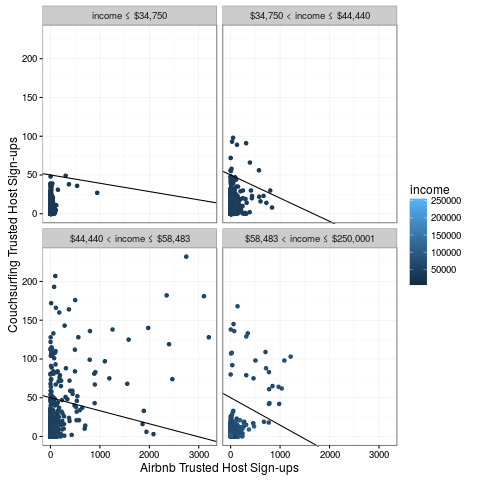

In [356]:
%%R
inclabs = list('a'='income ≤ $34,750',
               'b'='$34,750 < income ≤ $44,440',
               'c'='$44,440 < income ≤ $58,483',
               'd'='$58,483 < income ≤ $250,0001')
inclabeller <- function(variable,value){
  return(inclabs[value])}

fittedslope = data.frame(quartile = c('a','b','c','d'), 
                         slp = c(-0.0107052, -0.0298937, -0.01683504, -0.03541748),
                        intrcpt = c(50,50,50,50))
np = ggplot(abcs_popinc, aes(x=signups_ab, y=signups_cs, colour=income)) + 
facet_wrap(~quartile, labeller=inclabeller) +
geom_point() + 
scale_colour_gradient() +
geom_abline(data=fittedslope, aes(slope=slp, intercept=intrcpt))+
ylab("Couchsurfing Trusted Host Sign-ups")+
xlab("Airbnb Trusted Host Sign-ups")+
theme_bw()

ggsave('figs/incomediffs.png',dp)
print(np)

In [151]:
%%R
abcs_popinc_lo = abcs_popinc[abcs_popinc["income"] <44442,]
abcs_popinc_hi = abcs_popinc[abcs_popinc["income"] >=44442,]

crowd_lo.fe = plm(signups_cs ~ signups_ab , index=c("citystate","year"), data=abcs_popinc_lo, model="within")
crowd_hi.fe = plm(signups_cs ~ signups_ab , index=c("citystate","year"), data=abcs_popinc_hi, model="within")

print(summary(crowd_lo.fe))
print(summary(crowd_hi.fe))


Oneway (individual) effect Within Model

Call:
plm(formula = signups_cs ~ signups_ab, data = abcs_popinc_lo, 
    model = "within", index = c("citystate", "year"))

Unbalanced Panel: n=3778, T=1-8, N=9874

Residuals :
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-29.400  -0.304   0.000   0.194  20.600 

Coefficients :
             Estimate Std. Error t-value  Pr(>|t|)    
signups_ab -0.0307890  0.0010966 -28.077 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    29936
Residual Sum of Squares: 26508
R-Squared:      0.11453
Adj. R-Squared: 0.070695
F-statistic: 788.323 on 1 and 6095 DF, p-value: < 2.22e-16
Oneway (individual) effect Within Model

Call:
plm(formula = signups_cs ~ signups_ab, data = abcs_popinc_hi, 
    model = "within", index = c("citystate", "year"))

Unbalanced Panel: n=5063, T=1-8, N=15999

Residuals :
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-84.300  -0.344   0.000   0.294  91.100 

Coefficients :
              Estim

In [152]:
%%R

crowd.model = lmer(signups_cs ~ signups_ab + (1|citystate), data=abcs_popinc)
print(summary(crowd.model))

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: signups_cs ~ signups_ab + (1 | citystate)
   Data: abcs_popinc

REML criterion at convergence: 145593.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-23.195  -0.135  -0.041   0.092  32.138 

Random effects:
 Groups    Name        Variance Std.Dev.
 citystate (Intercept) 24.912   4.991   
 Residual               7.916   2.813   
Number of obs: 25873, groups:  citystate, 8841

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  1.009e+00  5.749e-02  9.928e+03   17.56   <2e-16 ***
signups_ab  -1.419e-02  4.269e-04  2.033e+04  -33.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
signups_ab -0.030


In [265]:
%R methods(class='plm')

array(['ercomp.plm', 'fixef.plm', 'has.intercept.plm', 'model.matrix.plm',
       'pFtest.plm', 'plmtest.plm', 'plot.plm', 'pmodel.response.plm',
       'pooltest.plm', 'predict.plm', 'residuals.plm', 'summary.plm',
       'vcovBK.plm', 'vcovDC.plm', 'vcovG.plm', 'vcovHC.plm', 'vcovNW.plm',
       'vcovSCC.plm'], 
      dtype='<U19')

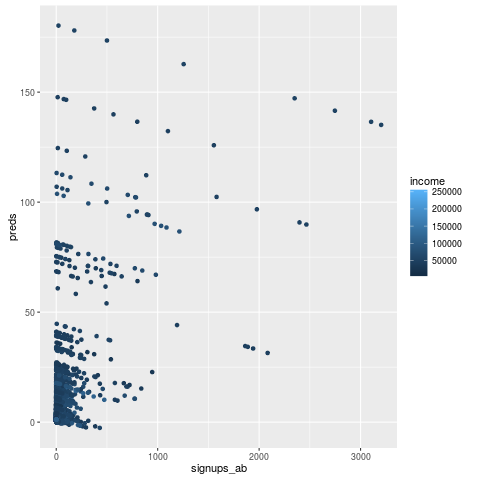

In [272]:
%%R
abcs_popinc$preds = predict(crowd.model, abcs_popinc)
pp = ggplot(abcs_popinc, aes(x=signups_ab, y=preds, colour=income)) + geom_point()
print(pp)

In [153]:
%%R


#thoughts, pop a random effect? can it be if it's continuous
#compare signs per pop instead?
#try interactions signs*pop, signs*income
#try randome slopes too 1+ab|citystat 1+ab|year
#consider rescaling
crowd.model = lmer(signups_cs ~ signups_ab + year + citystate + pop, data=abcs_popinc, REML=FALSE)
print(summary(crowd.model))


plot(Effect('signups_ab', crowd.model))


Error: No random effects terms specified in formula


/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Error: No random effects terms specified in formula

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [154]:
%%R

crowd_quartile_i.model = lmer(signups_cs ~  quartile*signups_ab  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)
crowd_income_i.model = lmer(signups_cs ~  income*signups_ab  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)

#crowd_income_pop.model = lmer(signups_cs ~  income*signups_ab*pop  + (1|citystate) + year, data=abcs_popinc, REML=FALSE)


crowd_quartile.model = lmer(signups_cs ~  quartile + signups_ab  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)
crowd_income.model = lmer(signups_cs ~  income + signups_ab  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)
crowd_income_ab.model = lmer(signups_ab ~  income + signups_cs  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)


print(summary(crowd_quartile_i.model))
print(summary(crowd_income_i.model))

#print(summary(crowd_income_pop.model))
print(summary(crowd_income_ab.model))

print(summary(crowd_quartile.model))
print(summary(crowd_income.model))


Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: signups_cs ~ quartile * signups_ab + (1 | citystate) + year +      pop
   Data: abcs_popinc

     AIC      BIC   logLik deviance df.resid 
137635.8 137733.7 -68805.9 137611.8    25861 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-30.2178  -0.1545  -0.0146   0.1036  30.2948 

Random effects:
 Groups    Name        Variance Std.Dev.
 citystate (Intercept) 10.434   3.230   
 Residual               7.188   2.681   
Number of obs: 25873, groups:  citystate, 8841

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           5.193e+02  1.750e+01  2.221e+04  29.669  < 2e-16 ***
quartileb            -4.072e-02  1.254e-01  1.180e+04  -0.325 0.745418    
quartilec            -5.002e-03  1.230e-01  1.165e+04  -0.041 0.967560    
quartiled            -2.782e-01  1.181e-01  1.154e+04  -2.355 0.018524 

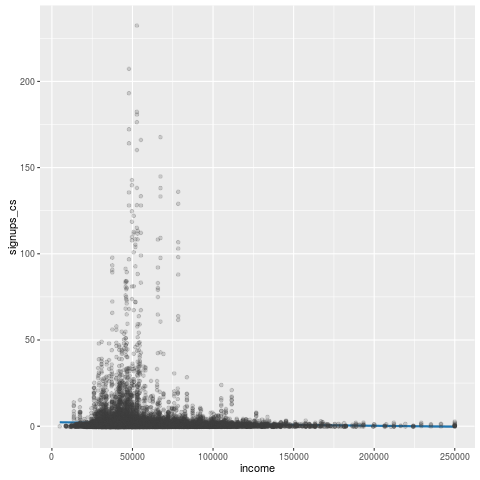

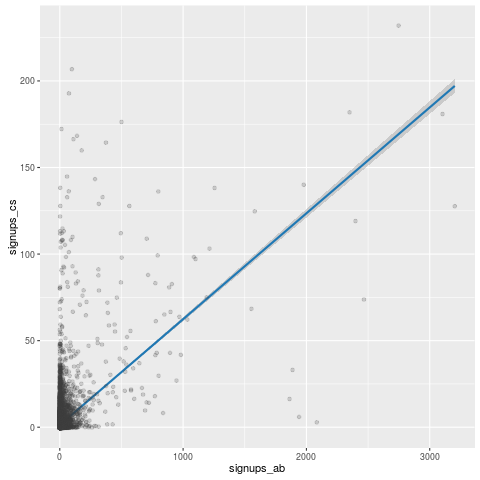

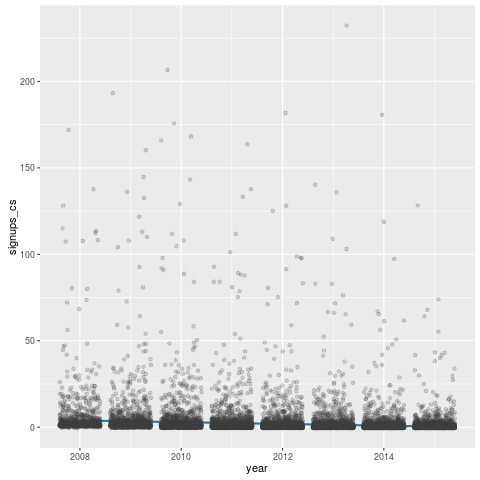

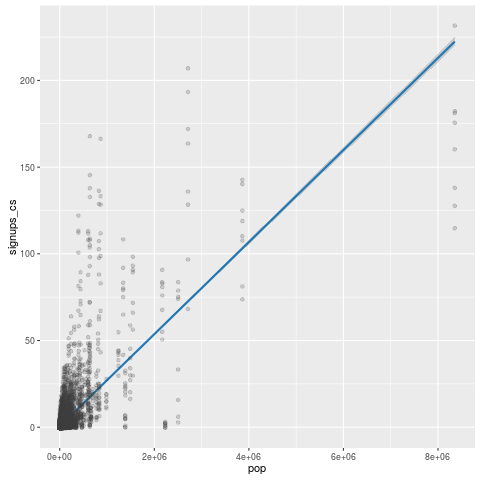

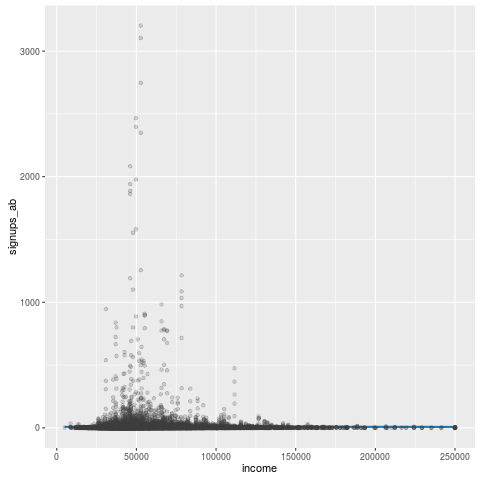

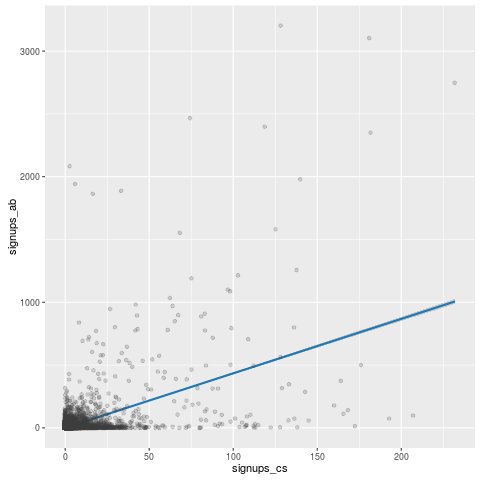

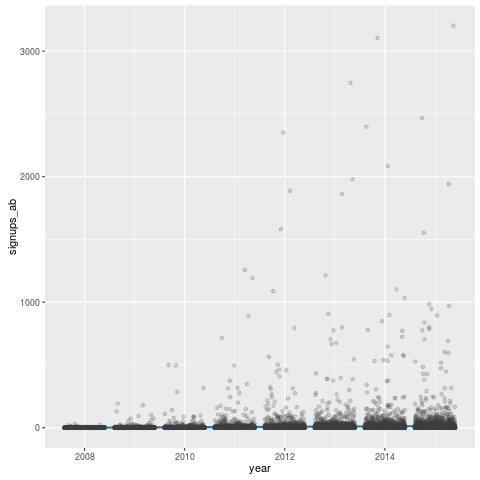

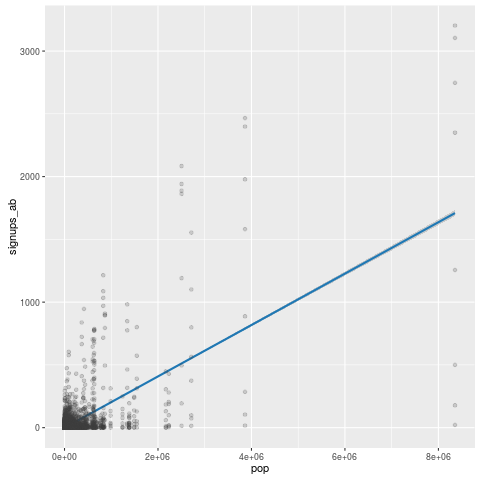

In [155]:
%%R

sjp.lmer(crowd_income.model,type = "fe.pred", vars='signups_ab')
sjp.lmer(crowd_income_ab.model,type = "fe.pred", vars='signups_ab')


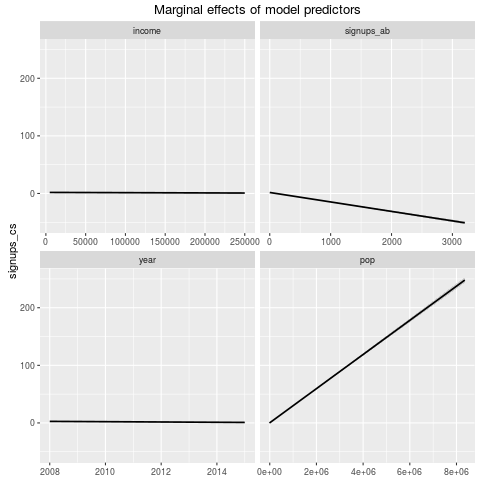

In [156]:
%%R
sjp.lmer(crowd_income.model, type ='eff')

# Cities to check for overlap
highest and lowest correlations, ratios, and income for harman and zhiyi

In [157]:
corr_sorted = big_cities_corr_refver.sort('signup_abcs_correlation')
least_corr, most_corr = corr_sorted[:10], corr_sorted[-10:]
print(least_corr)
print(most_corr)

                signup_abcs_correlation
citystate                              
cherry hill_nj                       -1
pittsburg_ks                         -1
batavia_il                           -1
nutley_nj                            -1
leland_nc                            -1
leeds_me                             -1
leeds_ma                             -1
lee_me                               -1
lebanon_pa                           -1
lebanon_or                           -1
                   signup_abcs_correlation
citystate                                 
st george_ut                             1
floral park_ny                           1
forest_va                                1
clark fork_id                            1
fortuna_ca                               1
travelers rest_sc                        1
calais_vt                                1
watkins glen_ny                          1
findlay_oh                               1
hoover_al                                1


In [158]:
sorted_ratio = abcs_census_size.sort('ratio')
least_ratio, most_ratio = sorted_ratio[:10], sorted_ratio[-10:]
print(least_ratio)
print(most_ratio)

       signups_cs  signups_ab             citystate  income    pop     ratio  \
2279            2         757      big bear lake_ca   41058   5104  0.002642   
19527           3         801          park city_ut   88438   7845  0.003745   
24761           2         472  sunny isles beach_fl   45972  21583  0.004237   
13085           1         227           keystone_co   47414   1243  0.004405   
6309            2         417          davenport_fl   36234   3022  0.004796   
20857           1         179       provincetown_ma   43272   2777  0.005587   
4033            1         173      carnelian bay_ca   72083    463  0.005780   
22290           1         139         sag harbor_ny   94784   1954  0.007194   
10665           1         132   hallandale beach_fl   33838  38270  0.007576   
13477           2         243          la quinta_ca   71074  38774  0.008230   

       interaction high_inc  
2279      31080906    False  
19527     70838838     True  
24761     21698784    False  

In [159]:
sorted_income = abcs_census_size.sort('income')
least_income, most_income = sorted_income[:10], sorted_income[-10:]
print(least_income)
print(most_income)

       signups_cs  signups_ab         citystate  income    pop     ratio  \
9435            1           6  garden valley_id   12292    150  0.166667   
2723           71          72          boone_nc   13608  17802  0.986111   
1422            1           9    bakersville_nc   14091    391  0.111111   
3853            1           2        campton_ky   14125    522  0.500000   
20670           1           1   pottersville_ny   14280    485  1.000000   
3735            2           1        calumet_mi   15242    765  2.000000   
6070            8           7      cullowhee_nc   15607   5531  1.142857   
10418           1           6     greenwater_wa   15652    108  0.166667   
6778            1           5          dixon_nm   15851    870  0.200000   
19026           4           5       ooltewah_tn   17019    325  0.800000   

       interaction high_inc  
9435         73752    False  
2723        979776    False  
1422        126819    False  
3853         28250    False  
20670        

# mulitlisters, multicities

In [160]:
ab_df.head()

,host_id,host_since,smart_location,number_of_reviews,any_reviews
0,5803,2008-12-30,"Washington, DC",13,1
1,24098,2009-07-01,"Siren, WI",0,0
2,36016,2009-09-03,"Hollidaysburg, PA",18,1
3,38067,2009-09-12,"Kihei, HI",4,1
4,38067,2009-09-12,"Kihei , HI",0,0


In [161]:
host_num_cities = ab_df[['host_id','smart_location']].groupby(by='host_id').agg({'host_id':len,
                                                                                 'smart_location':lambda x: len(set(x))})

In [162]:
host_num_cities

,smart_location,host_id
host_id,,
23,1,1
42,1,1
43,1,1
46,1,1
83,1,1
240,1,1
249,1,1
283,1,1
316,1,1


In [163]:
multi_city_hosts = host_num_cities[host_num_cities['smart_location'] > 1]

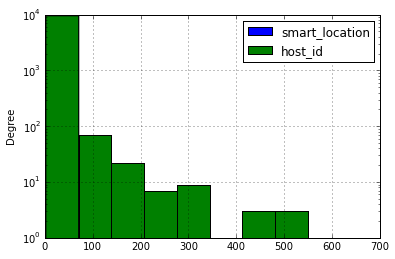

In [164]:
multi_city_hosts.plot(kind='hist')
plt.yscale('log')

In [165]:
multi_city_hosts.sort('smart_location',ascending=False).head()

,smart_location,host_id
host_id,,
50521917,450,687
48618586,146,288
9296727,101,305
31148752,87,416
21939069,72,102


In [166]:
multilisters = host_num_cities[host_num_cities['host_id'] > 2]

In [167]:
len(multilisters)/len(host_num_cities)

0.07406298483899942

In [168]:
len(multi_city_hosts)/len(multilisters)

0.5897341663604068

# 58% of multilisters have listings in more than 1 city too

In [169]:
ab_df

,host_id,host_since,smart_location,number_of_reviews,any_reviews
0,5803,2008-12-30,"Washington, DC",13,1
1,24098,2009-07-01,"Siren, WI",0,0
2,36016,2009-09-03,"Hollidaysburg, PA",18,1
3,38067,2009-09-12,"Kihei, HI",4,1
4,38067,2009-09-12,"Kihei , HI",0,0
5,38067,2009-09-12,"Makawao, HI",0,0
6,49162,2009-10-28,"Paauilo, HI",2,1
7,55469,2009-11-18,"Key Largo, FL",12,1
8,114555,2010-04-27,"Lomita, CA",8,1
9,153486,2010-06-27,"Orlando, FL",0,0
